# Initial EDA 

In [69]:
!pip install pandas -q
!pip install matplotlib -q 
!pip install seaborn -q
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("complete_dataset.csv")

print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB


In [9]:
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
         date      demand        RRP  demand_pos_RRP  RRP_positive  \
0  2015-01-01   99635.030  25.633696       97319.240     26.415953   
1  2015-01-02  129606.010  33.138988      121082.015     38.837661   
2  2015-01-03  142300.540  34.564855      142300.540     34.564855   
3  2015-01-04  104330.715  25.005560      104330.715     25.005560   
4  2015-01-05  118132.200  26.724176      118132.200     26.724176   

   demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
0        2315.790     -7.240000         0.020833             13.3   
1        8523.995    -47.809777         0.062500             15.4   
2           0.000      0.000000         0.000000             20.0   
3           0.000      0.000000         0.000000             16.3   
4           0.000      0.000000         0.000000             15.0   

   max_temperature  solar_exposure  rainfall school_day holiday  
0             26.9            23.6       0.0          N       Y  
1             38.

In [10]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              demand          RRP  demand_pos_RRP  RRP_positive  \
count    2106.000000  2106.000000     2106.000000   2106.000000   
mean   120035.476503    76.079554   119252.305055     76.553847   
std     13747.993761   130.246805    14818.631319    130.114184   
min     85094.375000    -6.076028    41988.240000     13.568986   
25%    109963.650000    38.707040   109246.250000     39.117361   
50%    119585.912500    66.596738   119148.082500     66.869058   
75%    130436.006250    95.075012   130119.477500     95.130181   
max    170653.840000  4549.645105   170653.840000   4549.645105   

       demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
count     2106.000000   2106.000000      2106.000000      2106.000000   
mean       783.171448     -2.686052         0.008547        11.582289   
std       3578.920686     19.485432         0.039963         4.313711   
min          0.000000   -342.220000         0.000000         0.600000   
25%       

Missing values

In [58]:
print("missing_values")
#print(df.isnull().sum())
df.isnull().sum()[df.isnull().sum() > 0]


missing_values


solar_exposure    1
rainfall          3
dtype: int64

Columns that have null values

In [61]:
df.isnull().sum().value_counts()

0    12
1     1
3     1
Name: count, dtype: int64

In [19]:
df.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
2101    False
2102    False
2103    False
2104    False
2105    False
Length: 2106, dtype: bool

**No**  duplicate rows present in the dataset

**2 columns** have null values i.e. solar exposure and rainfall

Demand over time 


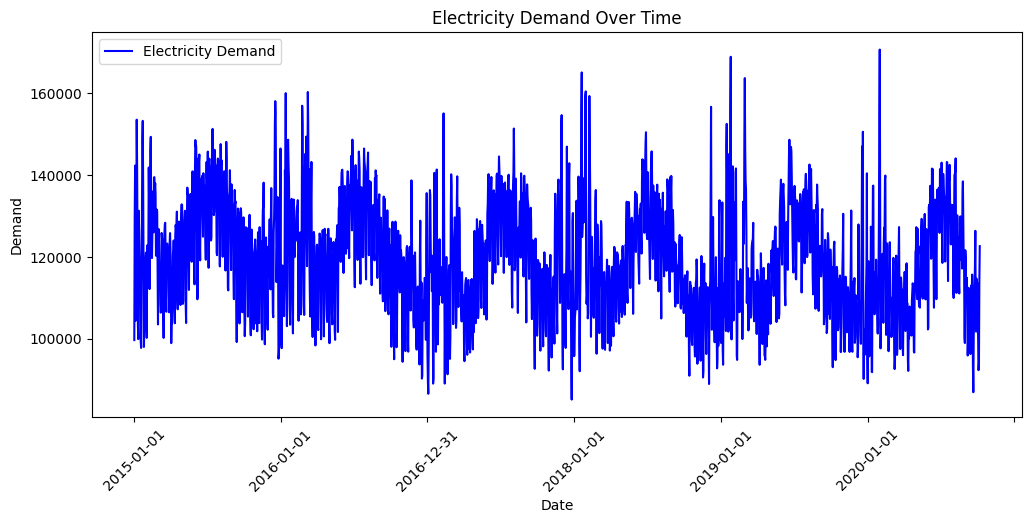

In [38]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['demand'], label='Electricity Demand', color='b')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Electricity Demand Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

plt.show()

In [41]:
print(df.columns)

Index(['date', 'demand', 'RRP', 'demand_pos_RRP', 'RRP_positive',
       'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature',
       'max_temperature', 'solar_exposure', 'rainfall', 'school_day',
       'holiday'],
      dtype='object')


In [39]:
print(df.dtypes)

date                object
demand             float64
RRP                float64
demand_pos_RRP     float64
RRP_positive       float64
demand_neg_RRP     float64
RRP_negative       float64
frac_at_neg_RRP    float64
min_temperature    float64
max_temperature    float64
solar_exposure     float64
rainfall           float64
school_day          object
holiday             object
dtype: object


In [51]:
with open("EDA_Findings.md", "r") as f:
    content = f.read()

print(content)


## Key Findings from EDA
- Basic dataset insights and summary statistics provided.
- Missing values and duplicates checked.
- Initial visualization of electricity demand trends generated.
- Correlation between variables explored.



# Advanced EDA

## Handling Date/Time features of the data

In [70]:
# Ensure Date is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract important time-based features
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day
df['Weekday'] = df['date'].dt.weekday

print(df[['date', 'Year', 'Month', 'Day', 'Weekday']].head())


        date  Year  Month  Day  Weekday
0 2015-01-01  2015      1    1        3
1 2015-01-02  2015      1    2        4
2 2015-01-03  2015      1    3        5
3 2015-01-04  2015      1    4        6
4 2015-01-05  2015      1    5        0


## Outlier detection using Boxplots 

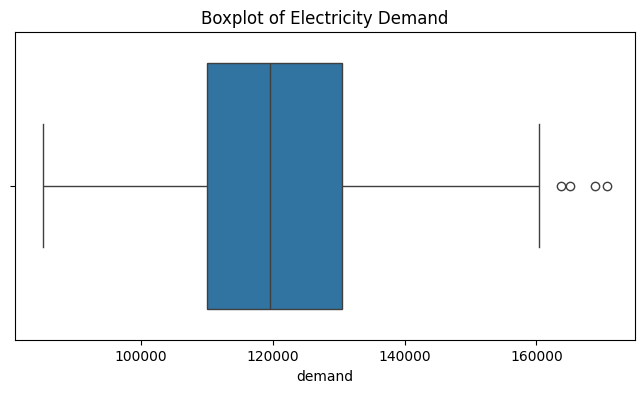


Outliers Found: 4
                              date      demand   Z_Score
1114 1970-01-01 00:00:00.000017550  165070.595  3.276537
1485 1970-01-01 00:00:00.000017921  168894.845  3.554771
1520 1970-01-01 00:00:00.000017956  163682.040  3.175513
1856 1970-01-01 00:00:00.000018292  170653.840  3.682747


In [67]:
!pip install scipy
from scipy.stats import zscore

# Boxplot to detect outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['demand'])
plt.title("Boxplot of Electricity Demand")
plt.show()

# Detecting outliers using Z-score
df['Z_Score'] = zscore(df['demand'])
outliers = df[df['Z_Score'].abs() > 3]  # Any data point with Z-score > 3 is an outlier
print(f"\nOutliers Found: {outliers.shape[0]}")
print(outliers[['date', 'demand', 'Z_Score']])


## Feature Engineering

In [84]:
# Creating rolling mean & rolling standard deviation 
df['Rolling_Mean_7'] = df['demand'].rolling(window=7).mean()  
df['Rolling_Std_7'] = df['demand'].rolling(window=7).std()

# Lag Features (Shifting values for prediction)
df['Lag_1'] = df['demand'].shift(1)  
df['Lag_7'] = df['demand'].shift(7)  

# Drop NA values caused by rolling & shifting
df.dropna(inplace=True)
print(df.head())


         date     demand        RRP  demand_pos_RRP  RRP_positive  \
21 2015-01-22  153232.10  35.230761       153232.10     35.230761   
22 2015-01-23  138095.20  40.604200       138095.20     40.604200   
23 2015-01-24  116310.59  20.922000       116310.59     20.922000   
24 2015-01-25   97959.46  16.541418        97959.46     16.541418   
25 2015-01-26  103769.48  16.936013       103769.48     16.936013   

    demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
21             0.0           0.0              0.0             18.7   
22             0.0           0.0              0.0             20.2   
23             0.0           0.0              0.0             15.8   
24             0.0           0.0              0.0             14.7   
25             0.0           0.0              0.0             11.6   

    max_temperature  ...  school_day  holiday  Year Month  Day  Weekday  \
21             35.8  ...           N        N  2015     1   22        3   
22            

## Decomposing Trend & Seasonality  

<Figure size 1200x800 with 0 Axes>

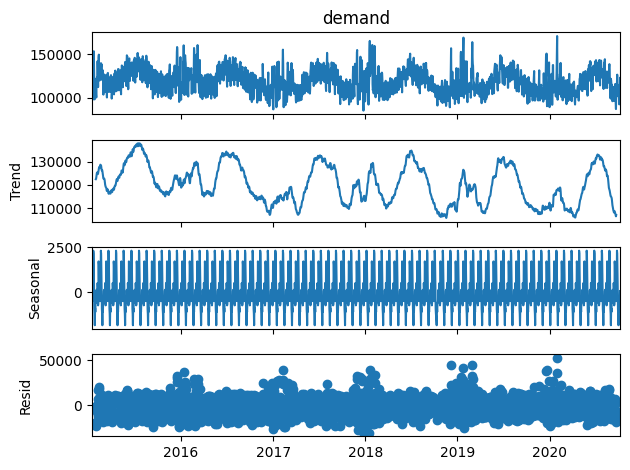

In [83]:
!pip install statsmodels -q
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing time series into trend, seasonality, and residuals
result = seasonal_decompose(df.set_index('date')['demand'], model='additive', period=30)

# Plot decomposition
plt.figure(figsize=(12, 8))
result.plot()
plt.show()


## Autocorrelation and partial autocorrelation analysis

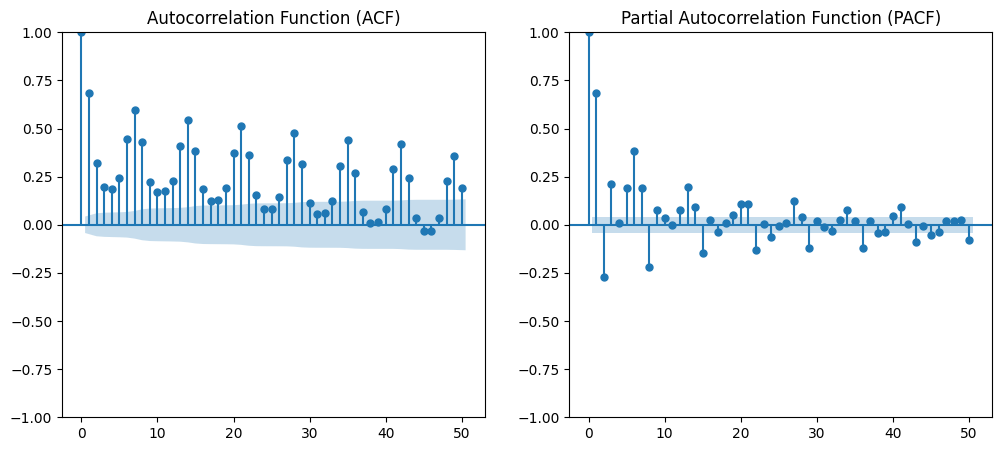

In [80]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_acf(df['demand'], lags=50, ax=plt.gca())
plt.title("Autocorrelation Function (ACF)")

plt.subplot(1, 2, 2)
plot_pacf(df['demand'], lags=50, ax=plt.gca())
plt.title("Partial Autocorrelation Function (PACF)")

plt.show()

## Seasonal Trends - Monthly and weekly patterns 

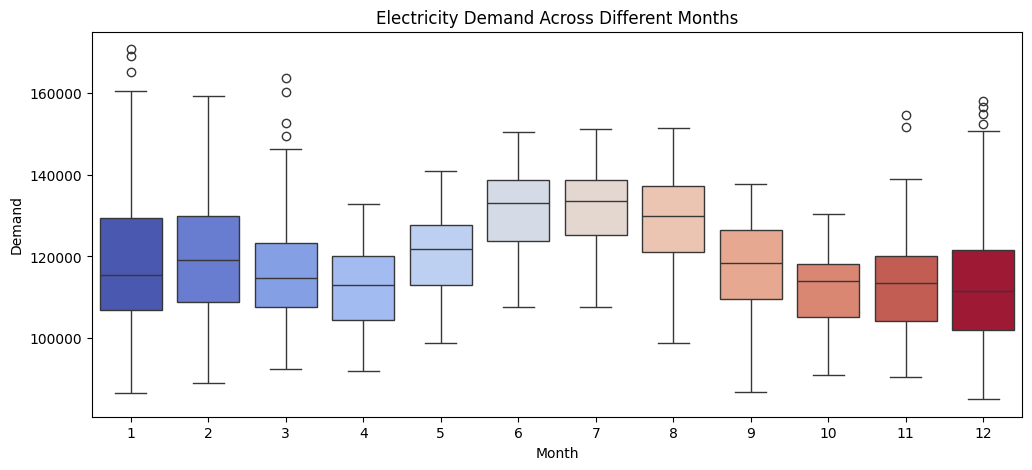

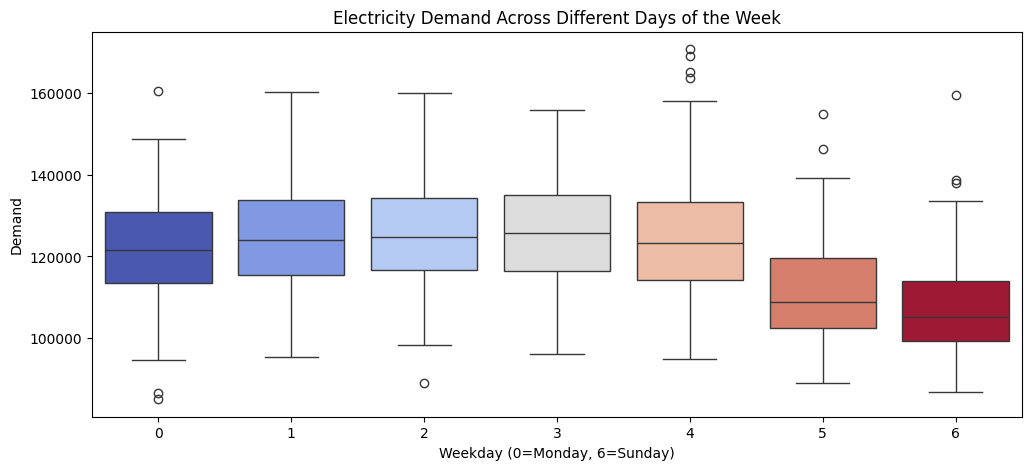

In [82]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=df['Month'], y=df['demand'], hue = df['Month'], palette='coolwarm', legend=False)
plt.title("Electricity Demand Across Different Months")
plt.xlabel("Month")
plt.ylabel("Demand")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x=df['Weekday'], y=df['demand'], hue = df['Weekday'], palette='coolwarm', legend= False)
plt.title("Electricity Demand Across Different Days of the Week")
plt.xlabel("Weekday (0=Monday, 6=Sunday)")
plt.ylabel("Demand")
plt.show()


**Findings :**

**Handling Missing values:** Using imputation methods.

No duplicates found in the dataset.

**Outliers** : found 4 outliers from the data which can be detected by boxplots or IQR method

**Feature Engineering** : Extracted time-based features for year, month and weekly , captured short-term trends and smooth fluctuations , creating lag features help capture dependencies over time .

**Decomposition** : Helps in understanding the underlying patterns by breaking it into components like trend and seasonal component 

**Autocorrelation**: ACF and PACF help identify how past values impact future values.

**Seasonal Trends** : Helps study and understand the seasonal electricity surge patterns which can be used to draw insights for particular months and weekdays.

# Weather Factors

## Correlation between demand and weather aspects

min_temperature   -0.156118
max_temperature   -0.073216
solar_exposure    -0.257406
rainfall          -0.064609
Name: demand, dtype: float64


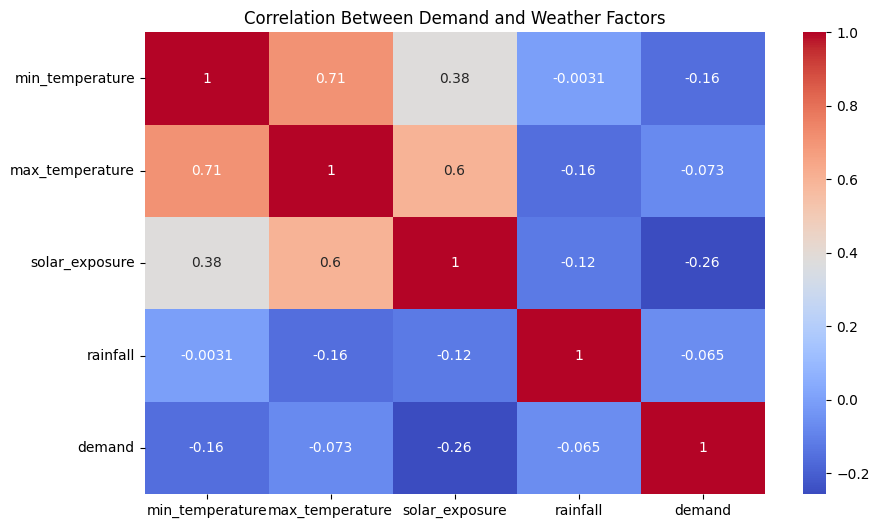

In [49]:
# Correlate demand with weather factors
weather_factors = ['min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']
correlations = df[weather_factors + ['demand']].corr()['demand'].drop('demand')
print(correlations)

# Visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df[weather_factors + ['demand']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Demand and Weather Factors')
plt.show()